<a href="https://colab.research.google.com/github/mehakhafeez/NLPprojectweek6/blob/main/NLPProjectDistilbertMshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
pip install textblob nltk rouge-score

In [28]:
pip install rouge-score

In [29]:
pip install transformers==4.23.0

In [30]:
pip install sentencepiece==0.1.96

Importing Necessary Libraries

Import libraries for data manipulation, machine learning models, visualization, and text processing.

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import (
    DistilBertTokenizer, DistilBertForSequenceClassification,
    Trainer, TrainingArguments
)
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.translate.bleu_score import sentence_bleu
from sklearn.decomposition import PCA
from tqdm import tqdm

In [32]:
dataset1 = pd.read_csv('/content/1429_1.csv', quoting=3, on_bad_lines='skip')
# quoting=3 tells pandas to use the QUOTE_NONE strategy. This means that pandas will not treat any character as a quote character. This way if there are unclosed quotes, it ignores them.
# on_bad_lines='skip' replaces the deprecated 'error_bad_lines=False' to skip bad lines.
dataset2 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', quoting=3, on_bad_lines='skip')
dataset3 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', quoting=3, on_bad_lines='skip')

In [26]:
# Combine datasets
data = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)


In [33]:
# Data Cleaning
data = data.drop_duplicates()
data = data.dropna(subset=['reviews.text'])
data['reviews.text'] = data['reviews.text'].str.strip()
data['reviews.text'] = data['reviews.text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)


Using TextBlob to assign sentiment labels ('positive', 'neutral', or 'negative') to each review based on its polarity.

In [34]:
# Sentiment Analysis with TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['reviews.text'].apply(get_sentiment)

In [35]:
# Display the first few rows of the dataset with the new 'sentiment' column
print(data[['reviews.text', 'sentiment']].head(10))

                                        reviews.text sentiment
0  This product so far has not disappointed My ch...  positive
1  great for beginner or experienced person Bough...  positive
2  Ive had my Fire HD  two weeks now and I love i...  positive
3  This amazon fire  inch tablet is the perfect s...  positive
4  I love ordering books and reading them with th...  positive
5  Not easy for elderly users cease of ads that p...  negative
6  Wanted my father to have his first tablet and ...  positive
7  Simply does everything I need Thank youAnd sil...   neutral
8  Got it as a present and love the size of the s...  positive
9  nice reader almost perfect for what i wantneed...  positive


Data Preparation for Machine Learning
Splitting data into features (X) and labels (y), followed by a train-test split.
Also encoding sentiment labels into numeric values: positive=2, neutral=1, negative=0.


In [36]:
# Sentiment Evaluation
X = data['reviews.text']
y = data['sentiment']


In [37]:
# Encode sentiments
y = y.map({'positive': 2, 'neutral': 1, 'negative': 0})

In [38]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Text Vectorization
 Converting the textual data into numeric representations using TF-IDF (Term Frequency-Inverse Document Frequency).


In [39]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Logistic Regression Model

Training a Logistic Regression model and evaluating its performance.
Logistic Regression Evaluation
Computing metrics (accuracy, precision, recall, F1-score) for Logistic Regression.
Displaying a confusion matrix to visualize the classification performance.


In [40]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)

y_pred_lr = lr_model.predict(X_test_vec)

In [41]:
# Evaluation Metrics for Logistic Regression
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Evaluation:
Accuracy: 0.9447453954496208
Precision: 0.9317990091407293
Recall: 0.9447453954496208
F1-Score: 0.9362387825815583
Confusion Matrix:
 [[  0   0  17]
 [  0 408  34]
 [  0   0 464]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       1.00      0.92      0.96       442
           2       0.90      1.00      0.95       464

    accuracy                           0.94       923
   macro avg       0.63      0.64      0.64       923
weighted avg       0.93      0.94      0.94       923



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

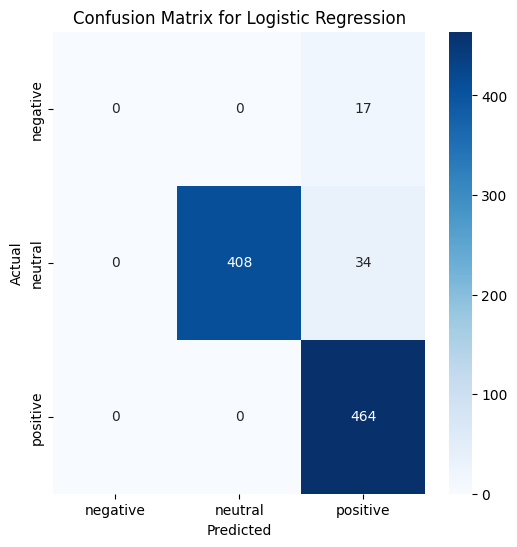

In [42]:
# Confusion Matrix Plot for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_lr),
    annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"]
)
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Naive Bayes Model

Training a Naive Bayes model and evaluating its performance.
Naive Bayes Evaluation
Computing metrics (accuracy, precision, recall, F1-score) for Naive Bayes.
Displaying a confusion matrix to visualize the classification performance.


In [43]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred_nb = nb_model.predict(X_test_vec)

In [44]:
# Evaluation Metrics for Naive Bayes
print("Naive Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Evaluation:
Accuracy: 0.9490790899241603
Precision: 0.9350799584942227
Recall: 0.9490790899241603
F1-Score: 0.940477260352809
Confusion Matrix:
 [[  0   1  16]
 [  0 412  30]
 [  0   0 464]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       1.00      0.93      0.96       442
           2       0.91      1.00      0.95       464

    accuracy                           0.95       923
   macro avg       0.64      0.64      0.64       923
weighted avg       0.94      0.95      0.94       923



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

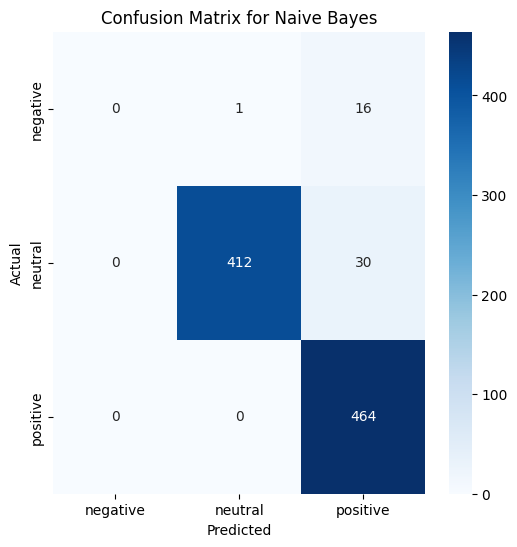

In [45]:
# Confusion Matrix Plot for Naive Bayes
plt.figure(figsize=(6, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_nb),
    annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"]
)
plt.title("Confusion Matrix for Naive Bayes")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

KMeans Clustering

Using PCA to reduce dimensionality for visualization.
Clustering reviews into 3 groups using KMeans and visualizing them in a 2D space.


In [46]:
# KMeans Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_vec.toarray())

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [47]:
# Assign clusters to data
data['cluster'] = kmeans.predict(pca.transform(vectorizer.transform(data['reviews.text']).toarray()))


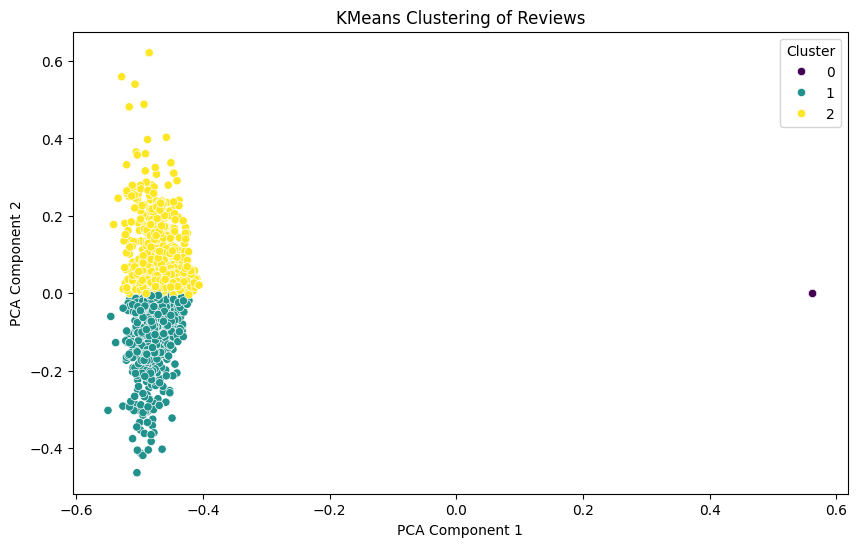

In [48]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title("KMeans Clustering of Reviews")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

Fine-Tuning DistilBERT

Using M-shot prompting and fine-tuning DistilBERT for sentiment classification.


In [49]:
# M-shot Prompting for DistilBERT
def m_shot_prompt(reviews, num_examples=5):
    example_prompts = [
        ("This product is great, I loved it!", "positive"),
        ("The product was okay, not what I expected.", "neutral"),
        ("Very poor quality, I would not recommend.", "negative"),
        ("Excellent value for the price, very satisfied.", "positive"),
        ("Not bad, does the job but could be better.", "neutral")
    ]

    prompt = "\n".join([f"Review: {ex[0]} => Sentiment: {ex[1]}" for ex in example_prompts[:num_examples]])
    prompt += "\n\n"
    prompt += f"Review: {reviews} => Sentiment: "

    return prompt

In [50]:
# Load DistilBERT Model and Tokenizer for Sentiment Classification
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.weight', 'pre_classifier.we

In [51]:
# Summarize Reviews for Each Cluster
def summarize_cluster(reviews, method="m-shot", tokenizer=None, model=None, max_length=50):
    """
    Summarize reviews for a given cluster.

    Parameters:
    - reviews (list): List of reviews in the cluster.
    - method (str): Method to use for summarization ("m-shot" or "distilbert").
    - tokenizer: Tokenizer for the DistilBERT model.
    - model: Pre-trained DistilBERT model.
    - max_length (int): Maximum length of the summary.

    Returns:
    - summary (str): Generated summary.
    """
    combined_reviews = " ".join(reviews)

    if method == "m-shot":
        # Use M-shot prompting
        prompt = m_shot_prompt(combined_reviews[:512])  # Truncate to 512 characters for large input
        # For demonstration, just return the prompt (a full implementation would involve a generative model)
        return f"Generated M-shot Prompt:\n{prompt}"

    elif method == "distilbert":
        # Use DistilBERT for summarization
        inputs = tokenizer.encode_plus(
            combined_reviews[:512],  # Truncate to 512 tokens
            return_tensors="pt",
            max_length=512,
            truncation=True
        )
        outputs = model(**inputs)
        summary = tokenizer.decode(outputs.logits.argmax(dim=-1), skip_special_tokens=True)
        return summary

    return "No valid method selected."

# Generate summaries for each cluster
cluster_summaries = {}
for cluster in data['cluster'].unique():
    cluster_reviews = data[data['cluster'] == cluster]['reviews.text'].tolist()
    # Choose the summarization method: "m-shot" or "distilbert"
    summary = summarize_cluster(cluster_reviews, method="m-shot", tokenizer=tokenizer, model=model)
    cluster_summaries[cluster] = summary

# Display summaries for each cluster
for cluster, summary in cluster_summaries.items():
    print(f"\nCluster {cluster} Summary:\n{summary}")


Cluster 1 Summary:
Generated M-shot Prompt:
Review: This product is great, I loved it! => Sentiment: positive
Review: The product was okay, not what I expected. => Sentiment: neutral
Review: Very poor quality, I would not recommend. => Sentiment: negative
Review: Excellent value for the price, very satisfied. => Sentiment: positive
Review: Not bad, does the job but could be better. => Sentiment: neutral

Review: This product so far has not disappointed My children love to use it and I like the ability to monitor control what content they see with ease great for beginner or experienced person Bought as a gift and she loves it This amazon fire  inch tablet is the perfect size I purchased it for my husband so that he has a bigger screen than just his phone He had gotten me one a few years ago so I knew it would be a good purchase I love ordering books and reading them with the reader Wanted my father to have his first => Sentiment: 

Cluster 2 Summary:
Generated M-shot Prompt:
Review: Th

In [52]:
# Tokenize the data for DistilBERT
def tokenize_function(examples):
    return tokenizer(examples['reviews.text'], padding=True, truncation=True)

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(y_train.tolist())
)

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(y_test.tolist())
)

In [53]:
# Fine-tune DistilBERT model
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
optimizer = AdamW(model.parameters(), lr=5e-5)

for epoch in range(3):  # Number of epochs
    model.train()
    for batch in tqdm(train_dataloader):
        optimizer.zero_grad()
        input_ids = batch[0]
        attention_mask = batch[1]
        labels = batch[2]

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        loss.backward()
        optimizer.step()

100%|██████████| 269/269 [33:58<00:00,  7.58s/it]


Evaluating DistilBERT

Evaluating the fine-tuned DistilBERT model on the test set.

In [55]:
# Evaluate DistilBERT model
model.eval()
y_pred_distilbert = []
y_true_distilbert = []

# Create test_dataloader (similar to how train_dataloader was defined)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False) # Shuffle is usually False for evaluation

for batch in tqdm(test_dataloader):
    input_ids = batch[0]
    attention_mask = batch[1]
    labels = batch[2]

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=-1)

    y_pred_distilbert.extend(predictions.tolist())
    y_true_distilbert.extend(labels.tolist())

100%|██████████| 116/116 [01:52<00:00,  1.03it/s]


In [56]:
print("DistilBERT Evaluation:")
print(classification_report(y_true_distilbert, y_pred_distilbert, target_names=['negative', 'neutral', 'positive']))

DistilBERT Evaluation:
              precision    recall  f1-score   support

    negative       0.65      0.65      0.65        17
     neutral       0.99      0.97      0.98       442
    positive       0.98      0.99      0.98       464

    accuracy                           0.98       923
   macro avg       0.87      0.87      0.87       923
weighted avg       0.98      0.98      0.98       923



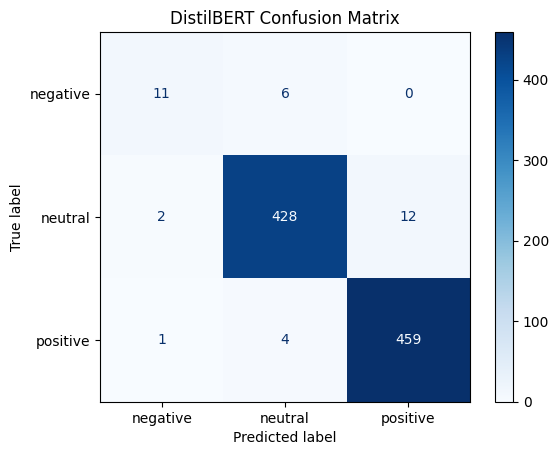

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix data based on DistilBERT evaluation results
cm = np.array([[11, 6, 0],  # predicted: negative, neutral, positive (actual vs predicted)
               [2, 428, 12],
               [1, 4, 459]])

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["negative", "neutral", "positive"])

# Plot confusion matrix with a title and color map
disp.plot(cmap='Blues', values_format='d')
plt.title("DistilBERT Confusion Matrix")
plt.show()